# load the datasets

In [1]:
import pandas as pd
#load the train values data set
data = pd.read_csv("TrainingSetValues.csv") 
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [2]:
#load training labels dataset
labels = pd.read_csv("TrainingSetLabels.csv") 
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [3]:
#load the test values dataset
test = pd.read_csv("TestSetValues.csv")
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


data describing:

In [4]:
#display the data types
data.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [6]:
#merged dataset for traianing
labels1= labels.drop(columns='id')
merged = pd.merge(data, labels1, left_index=True, right_index=True)
merged

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [8]:
# drop the id column
data1 = merged.drop(merged.columns[0], axis=1)
data1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Data visualization:

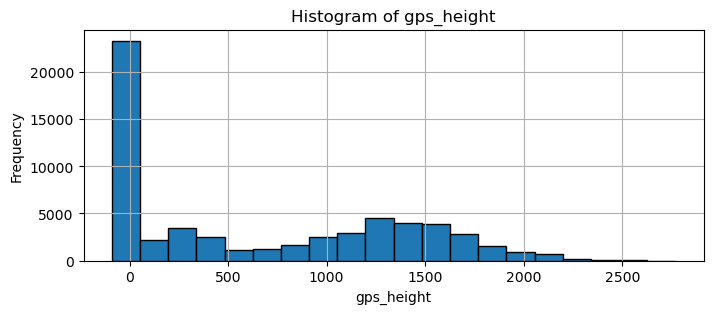

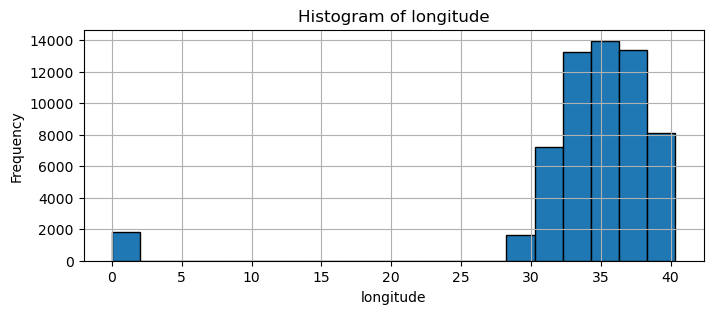

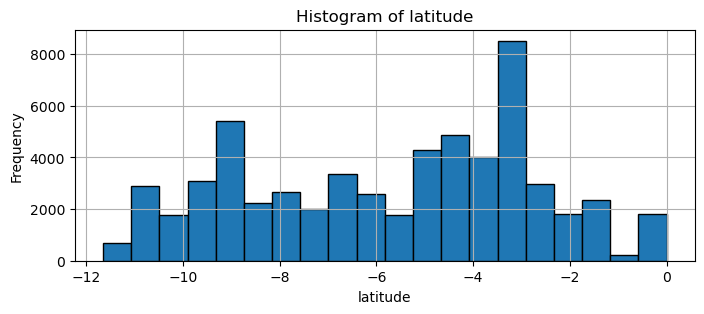

In [9]:
import matplotlib.pyplot as plt
#histogram for the numeric data

features_to_visualize = ['gps_height', 'longitude', 'latitude']

for feature in features_to_visualize:
    plt.figure(figsize=(8, 3))
    plt.hist(data1[feature], bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [10]:
#describe numeric features
data1.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [11]:
#display the count of missing values in each feature
import pandas as pd
missing_values_count = data1.isnull().sum()
print("Missing Values per Feature:")
print(missing_values_count)

Missing Values per Feature:
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_gro

In [12]:
# display the distribution of classes
labels['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

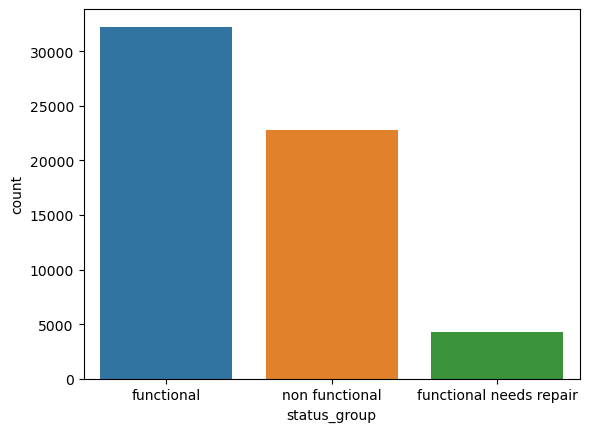

In [13]:
# plotting the distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=labels, x='status_group')
plt.show()

In [14]:
#make a copy for labels dataset
#encoding the classes 

labels1 = labels

import pandas as pd
from sklearn.preprocessing import LabelEncoder

class_names = ['functional', 'functional needs repair', 'non functional']


label_encoder = LabelEncoder()


labels1['status_group_encoded'] = label_encoder.fit_transform(labels1['status_group'])

# Map the class names to their corresponding integer values
class_mapping = {class_names[i]: i for i in range(len(class_names))}

# Print the mapping
print("Class Name Mapping:")
for class_name, encoded_value in class_mapping.items():
    print(f"{class_name}: {encoded_value}")




labels1.head()


Class Name Mapping:
functional: 0
functional needs repair: 1
non functional: 2


,id,status_group,status_group_encoded
0,69572,functional,0
1,8776,functional,0
2,34310,functional,0
3,67743,non functional,2
4,19728,functional,0


In [15]:
#encoding labels in merged dataset
class_names = ['functional', 'functional needs repair', 'non functional']

label_encoder = LabelEncoder()
data1['status_group_encoded'] = label_encoder.fit_transform(data1['status_group'])
class_mapping = {class_names[i]: i for i in range(len(class_names))}
# Print the mapping
print("Class Name Mapping:")
for class_name, encoded_value in class_mapping.items():
    print(f"{class_name}: {encoded_value}")
#after mapping    
data1[['status_group_encoded', 'status_group']]


Class Name Mapping:
functional: 0
functional needs repair: 1
non functional: 2


,status_group_encoded,status_group
0,0,functional
1,0,functional
2,0,functional
3,2,non functional
4,0,functional
...,...,...
59395,0,functional
59396,0,functional
59397,0,functional
59398,0,functional


# data preprocessing:

In [16]:
#drop original class label before encoding
data1 = data1.drop(columns='status_group')
data1

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group_encoded
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
59397,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0


In [17]:
#remove label and the name of the class just keep the encoded one
labels1 = labels1.drop(columns=['id' , 'status_group'])
labels1.head()

,status_group_encoded
0,0
1,0
2,0
3,2
4,0


In [18]:
#calculate the missing values of each feature to determine whta to drop
missing = round((data1.isna().sum())/len(data1)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

scheme_name              48.5
scheme_management         6.5
installer                 6.2
funder                    6.1
public_meeting            5.6
permit                    5.1
subvillage                0.6
water_quality             0.0
extraction_type_class     0.0
management                0.0
management_group          0.0
payment                   0.0
payment_type              0.0
quantity                  0.0
quality_group             0.0
dtype: float64

In [20]:
#data before dropping features
data1

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group_encoded
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
59397,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0


In [21]:
#removing duplicate rows
data1.drop_duplicates(inplace=True)
data1


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group_encoded
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
59397,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0


In [22]:
missing = round((data1.isna().sum())/len(data1)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

scheme_name              48.5
scheme_management         6.5
installer                 6.2
funder                    6.1
public_meeting            5.6
permit                    5.1
subvillage                0.6
water_quality             0.0
extraction_type_class     0.0
management                0.0
management_group          0.0
payment                   0.0
payment_type              0.0
quantity                  0.0
quality_group             0.0
dtype: float64

In [23]:
#removing the highest missing values features
data1 = data1.drop(columns=['scheme_name' , 'num_private'])

In [24]:
#make a copy from test data
test1 = test
test1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [25]:
#removing the highest missing values features
missing = round((test1.isna().sum())/len(test1)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)
#removing them from test data also
test1 = test1.drop(columns=['id','scheme_name' , 'num_private'])
test1

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,Internal,Magoma,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,Pangani,Kimnyak,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,Internal,Msatu,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,Ruvuma / Southern Coast,Kipindimbi,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,Ruvuma / Southern Coast,Losonga,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,Wami / Ruvu,Yombo,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,Pangani,Mkondoa,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,Internal,Juhudi,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,Lake Nyasa,Namakinga B,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [26]:
#data after droping features
data1

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group_encoded
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
59397,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0


In [27]:
#caculate the similarty between features

import pandas as pd
#quantitiy & quantity_group
feature1 = data['quantity']
feature2 = data['quantity_group']
#count matching values
matching_values = (feature1 == feature2).sum()
total_values = len(feature1)
# Calculate the percentage of similarity
percentage_similarity = (matching_values / total_values) * 100
print(f"The percentage of similarity between quantity and quantity_group is: {percentage_similarity:.2f}%")

#source & source_type
feature1 = data['source']
feature2 = data['source_type']
matching_values = (feature1 == feature2).sum()
total_values = len(feature1)
percentage_similarity = (matching_values / total_values) * 100
print(f"The percentage of similarity between source and source_type is: {percentage_similarity:.2f}%")

#waterpoint_type & waterpoint_type_group
feature1 = data['waterpoint_type']
feature2 = data['waterpoint_type_group']
matching_values = (feature1 == feature2).sum()
total_values = len(feature1)
percentage_similarity = (matching_values / total_values) * 100
print(f"The percentage of similarity between waterpoint_type and waterpoint_type_group is: {percentage_similarity:.2f}%")

#extraction_type & extraction_type_group & extraction_type_class
feature1 = data['extraction_type']
feature2 = data['extraction_type_group']
matching_values = (feature1 == feature2).sum()
total_values = len(feature1)
percentage_similarity = (matching_values / total_values) * 100
print(f"The percentage of similarity between extraction_type and extraction_type_group is: {percentage_similarity:.2f}%")

feature1 = data['extraction_type_group']
feature2 = data['extraction_type_class']
matching_values = (feature1 == feature2).sum()
total_values = len(feature1)
percentage_similarity = (matching_values / total_values) * 100
print(f"The percentage of similarity between extraction_type_group and extraction_type_class is: {percentage_similarity:.2f}%")


The percentage of similarity between quantity and quantity_group is: 100.00%
The percentage of similarity between source and source_type is: 62.30%
The percentage of similarity between waterpoint_type and waterpoint_type_group is: 89.73%
The percentage of similarity between extraction_type and extraction_type_group is: 95.84%
The percentage of similarity between extraction_type_group and extraction_type_class is: 67.27%


In [28]:
#drop duplicate features by at least 80%
data1 = data1.drop(columns=['quantity_group' , 'waterpoint_type_group' , 'extraction_type_group'])
test1 = test1.drop(columns=['quantity_group' , 'waterpoint_type_group' , 'extraction_type_group'])
data1


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group_encoded
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,pay annually,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,never pay,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,pay per bucket,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,never pay,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,2
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,...,pay per bucket,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,0
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,...,pay annually,annually,soft,good,enough,river,river/lake,surface,communal standpipe,0
59397,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,pay monthly,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,0
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,...,never pay,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,0


In [29]:
test1

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
0,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,Internal,Magoma,...,parastatal,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other
1,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,Pangani,Kimnyak,...,user-group,never pay,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe
2,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,Internal,Msatu,...,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other
3,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,Ruvuma / Southern Coast,Kipindimbi,...,user-group,unknown,unknown,soft,good,dry,shallow well,shallow well,groundwater,other
4,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,Ruvuma / Southern Coast,Losonga,...,user-group,pay monthly,monthly,soft,good,enough,spring,spring,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,Wami / Ruvu,Yombo,...,user-group,never pay,never pay,soft,good,enough,river,river/lake,surface,communal standpipe
14846,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,Pangani,Mkondoa,...,user-group,pay annually,annually,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump
14847,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,Internal,Juhudi,...,user-group,never pay,never pay,soft,good,insufficient,dam,dam,surface,communal standpipe
14848,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,Lake Nyasa,Namakinga B,...,user-group,never pay,never pay,soft,good,insufficient,river,river/lake,surface,communal standpipe


In [30]:
#display types to determin non-numeric features to handle it
data1.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
source    

In [31]:
#determine the values of nun numeric attributes and see whta can handeled by mapping
import pandas as pd
selected_features = ['amount_tsh', 'funder', 'installer' , 'wpt_name' , 'basin' , 'subvillage' , 'region' ,'lga' , 'ward' 
                     , 'public_meeting' , 'recorded_by' , 'scheme_management' , 'permit' , 'extraction_type' , 'extraction_type_class'
                     , 'management' , 'management_group' , 'payment' , 'payment_type' , 'water_quality' , 'quality_group' , 'quantity'
                    , 'source' , 'source_type' , 'source_class' ,'waterpoint_type']  
attribute_values_stats = {}
for feature in selected_features:
    value_counts = data[feature].value_counts()
    value_percentages = data[feature].value_counts(normalize=True) * 100
    stats = pd.DataFrame({'Count': value_counts, 'Percentage': value_percentages})
    attribute_values_stats[feature] = stats
for feature, stats in attribute_values_stats.items():
    print(f"Feature: {feature}")
    print(stats)
    print()


Feature: amount_tsh
            Count  Percentage
amount_tsh                   
0.0         41639   70.099327
500.0        3102    5.222222
50.0         2472    4.161616
1000.0       1488    2.505051
20.0         1463    2.462963
...           ...         ...
6300.0          1    0.001684
120000.0        1    0.001684
138000.0        1    0.001684
350000.0        1    0.001684
59.0            1    0.001684

[98 rows x 2 columns]

Feature: funder
                        Count  Percentage
funder                                   
Government Of Tanzania   9084   16.290372
Danida                   3114    5.584348
Hesawa                   2202    3.948855
Rwssp                    1374    2.463999
World Bank               1349    2.419167
...                       ...         ...
Muwasa                      1    0.001793
Msigw                       1    0.001793
Rc Mofu                     1    0.001793
Overland High School        1    0.001793
Samlo                       1    0.001793

[18

In [32]:
#drop features with the same values of all attributes (recoded_by)
#drop amount_tsh as its 70% zero values
data1 = data1.drop(columns=['amount_tsh','recorded_by'])
test1 = test1.drop(columns=['amount_tsh','recorded_by'])
data1

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group_encoded
0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,...,pay annually,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,0
1,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,...,never pay,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
2,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,pay per bucket,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,0
3,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,never pay,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,2
4,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,...,pay per bucket,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,0
59396,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,...,pay annually,annually,soft,good,enough,river,river/lake,surface,communal standpipe,0
59397,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,...,pay monthly,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,0
59398,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,...,never pay,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,0


In [33]:
#to caculate missing values with "unknown"
data1= data1.fillna('unknown')
data1

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group_encoded
0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,...,pay annually,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,0
1,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,...,never pay,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
2,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,pay per bucket,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,0
3,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,never pay,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,2
4,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,...,pay per bucket,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,0
59396,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,...,pay annually,annually,soft,good,enough,river,river/lake,surface,communal standpipe,0
59397,2011-04-11,unknown,0,unknown,34.017087,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,...,pay monthly,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,0
59398,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,...,never pay,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,0


In [34]:
#recalculate missing values after process missing string values
missing = round((test1.isna().sum())/len(test1)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(10)

scheme_management    6.5
funder               5.9
installer            5.9
public_meeting       5.5
permit               5.0
subvillage           0.7
source               0.0
quantity             0.0
quality_group        0.0
extraction_type      0.0
dtype: float64

# mapping non numeric features
and its suggested to remove(funder , istaller , wpt name , subvillage , Iga , ward)

In [35]:
#data befor mappping
data1

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group_encoded
0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,...,pay annually,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,0
1,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,...,never pay,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
2,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,pay per bucket,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,0
3,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,never pay,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,2
4,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,...,pay per bucket,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,0
59396,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,...,pay annually,annually,soft,good,enough,river,river/lake,surface,communal standpipe,0
59397,2011-04-11,unknown,0,unknown,34.017087,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,...,pay monthly,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,0
59398,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,...,never pay,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,0


In [36]:
#make a copu for data and  test data to be mapped into integers
test2 =test1
data2 = data1
test2

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,Internal,Magoma,Manyara,...,parastatal,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other
1,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,Pangani,Kimnyak,Arusha,...,user-group,never pay,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe
2,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,Internal,Msatu,Singida,...,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other
3,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,Ruvuma / Southern Coast,Kipindimbi,Lindi,...,user-group,unknown,unknown,soft,good,dry,shallow well,shallow well,groundwater,other
4,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,Ruvuma / Southern Coast,Losonga,Ruvuma,...,user-group,pay monthly,monthly,soft,good,enough,spring,spring,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,Wami / Ruvu,Yombo,Pwani,...,user-group,never pay,never pay,soft,good,enough,river,river/lake,surface,communal standpipe
14846,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,Pangani,Mkondoa,Tanga,...,user-group,pay annually,annually,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump
14847,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,Internal,Juhudi,Singida,...,user-group,never pay,never pay,soft,good,insufficient,dam,dam,surface,communal standpipe
14848,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,Lake Nyasa,Namakinga B,Ruvuma,...,user-group,never pay,never pay,soft,good,insufficient,river,river/lake,surface,communal standpipe


In [37]:
#display the copy before mapping
data2

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group_encoded
0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,...,pay annually,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,0
1,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,...,never pay,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
2,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,pay per bucket,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,0
3,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,never pay,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,2
4,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,...,pay per bucket,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,0
59396,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,...,pay annually,annually,soft,good,enough,river,river/lake,surface,communal standpipe,0
59397,2011-04-11,unknown,0,unknown,34.017087,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,...,pay monthly,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,0
59398,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,...,never pay,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,0


In [38]:
#encoding the strig vakues in both train and test data
import pandas as pd
from sklearn.preprocessing import LabelEncoder

non_numeric_features = data2.select_dtypes(include=['object', 'bool']).columns
label_encoders = {}
encoded_mappings = {}

for feature in non_numeric_features:
    le = LabelEncoder()
    data2[feature] = data2[feature].astype(str)
    data2[feature] = le.fit_transform(data2[feature])
    label_encoders[feature] = le
    # Store mapping
    encoded_mappings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display mappings
for feature, mapping in encoded_mappings.items():
    print(f"Encoding for feature '{feature}':")
    for original, encoded in mapping.items():
        print(f"  {original}: {encoded}")

# Apply the same encoders to the test data
for feature in non_numeric_features:
    le = label_encoders[feature]
    test2[feature] = test2[feature].astype(str)
    test2[feature] = test2[feature].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)


Encoding for feature 'date_recorded':
  2002-10-14: 0
  2004-01-07: 1
  2004-03-01: 2
  2004-03-06: 3
  2004-04-01: 4
  2004-04-05: 5
  2004-05-01: 6
  2004-06-01: 7
  2004-07-01: 8
  2004-08-01: 9
  2004-09-01: 10
  2004-12-01: 11
  2011-01-03: 12
  2011-01-04: 13
  2011-01-08: 14
  2011-02-01: 15
  2011-02-02: 16
  2011-02-03: 17
  2011-02-04: 18
  2011-02-14: 19
  2011-02-15: 20
  2011-02-16: 21
  2011-02-17: 22
  2011-02-18: 23
  2011-02-19: 24
  2011-02-20: 25
  2011-02-21: 26
  2011-02-22: 27
  2011-02-23: 28
  2011-02-24: 29
  2011-02-25: 30
  2011-02-26: 31
  2011-02-27: 32
  2011-02-28: 33
  2011-03-01: 34
  2011-03-02: 35
  2011-03-03: 36
  2011-03-04: 37
  2011-03-05: 38
  2011-03-06: 39
  2011-03-07: 40
  2011-03-08: 41
  2011-03-09: 42
  2011-03-10: 43
  2011-03-11: 44
  2011-03-12: 45
  2011-03-13: 46
  2011-03-14: 47
  2011-03-15: 48
  2011-03-16: 49
  2011-03-17: 50
  2011-03-18: 51
  2011-03-19: 52
  2011-03-20: 53
  2011-03-21: 54
  2011-03-22: 55
  2011-03-23: 56
  2

In [39]:
#display data after mapping
data2

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group_encoded
0,47,1368,1390,1518,34.938093,-9.856322,37398,1,11807,3,...,2,0,6,2,1,8,6,0,1,0
1,309,469,1399,545,34.698766,-2.147466,37194,4,15838,9,...,0,2,6,2,2,5,3,1,1,0
2,300,825,686,2048,37.460664,-3.821329,14572,5,9074,8,...,4,5,6,2,1,0,1,1,2,0
3,272,1740,263,1852,38.486161,-11.155298,37284,7,8982,12,...,0,2,6,2,0,3,0,0,2,2
4,104,20,0,119,31.130847,-1.825359,35528,4,7698,4,...,0,2,6,2,3,5,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,338,436,1210,201,37.169807,-3.253847,513,5,5681,6,...,4,5,6,2,1,8,6,0,1,0
59396,90,177,1212,265,35.249991,-9.070629,24074,6,2980,3,...,2,0,6,2,1,6,4,1,1,0
59397,75,1896,0,2131,34.017087,-8.750434,27926,6,8784,10,...,3,1,1,1,1,3,0,0,4,0
59398,41,884,0,1213,35.861315,-6.378573,29693,6,14012,2,...,0,2,6,2,2,7,5,0,4,0


In [40]:
#test data after mapping
test2

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
0,279,307,1996,375,35.290799,-4.059696,-1,0,8922,8,...,2,0,2,6,2,3,5,3,1,6
1,279,456,1569,390,36.656709,-3.309214,-1,5,-1,0,...,4,0,2,6,2,2,8,6,0,1
2,276,-1,1567,-1,34.767863,-5.004344,33644,0,12198,18,...,4,0,2,6,2,2,5,3,1,6
3,266,395,267,487,38.058046,-9.418672,-1,7,6420,7,...,4,6,6,6,2,0,7,5,0,6
4,330,134,1260,145,35.006123,-10.950412,20106,7,8110,16,...,4,3,1,6,2,1,8,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,29,261,34,404,38.852669,-6.582841,-1,8,19197,14,...,4,0,2,6,2,1,6,4,1,1
14846,54,523,0,607,37.451633,-5.350428,-1,5,11424,20,...,4,2,0,4,4,2,7,5,0,4
14847,307,-1,1476,-1,34.739804,-4.585587,1465,0,4277,18,...,4,0,2,6,2,2,0,1,1,1
14848,293,432,998,390,35.432732,-10.584159,11849,1,14232,16,...,4,0,2,6,2,2,6,4,1,1


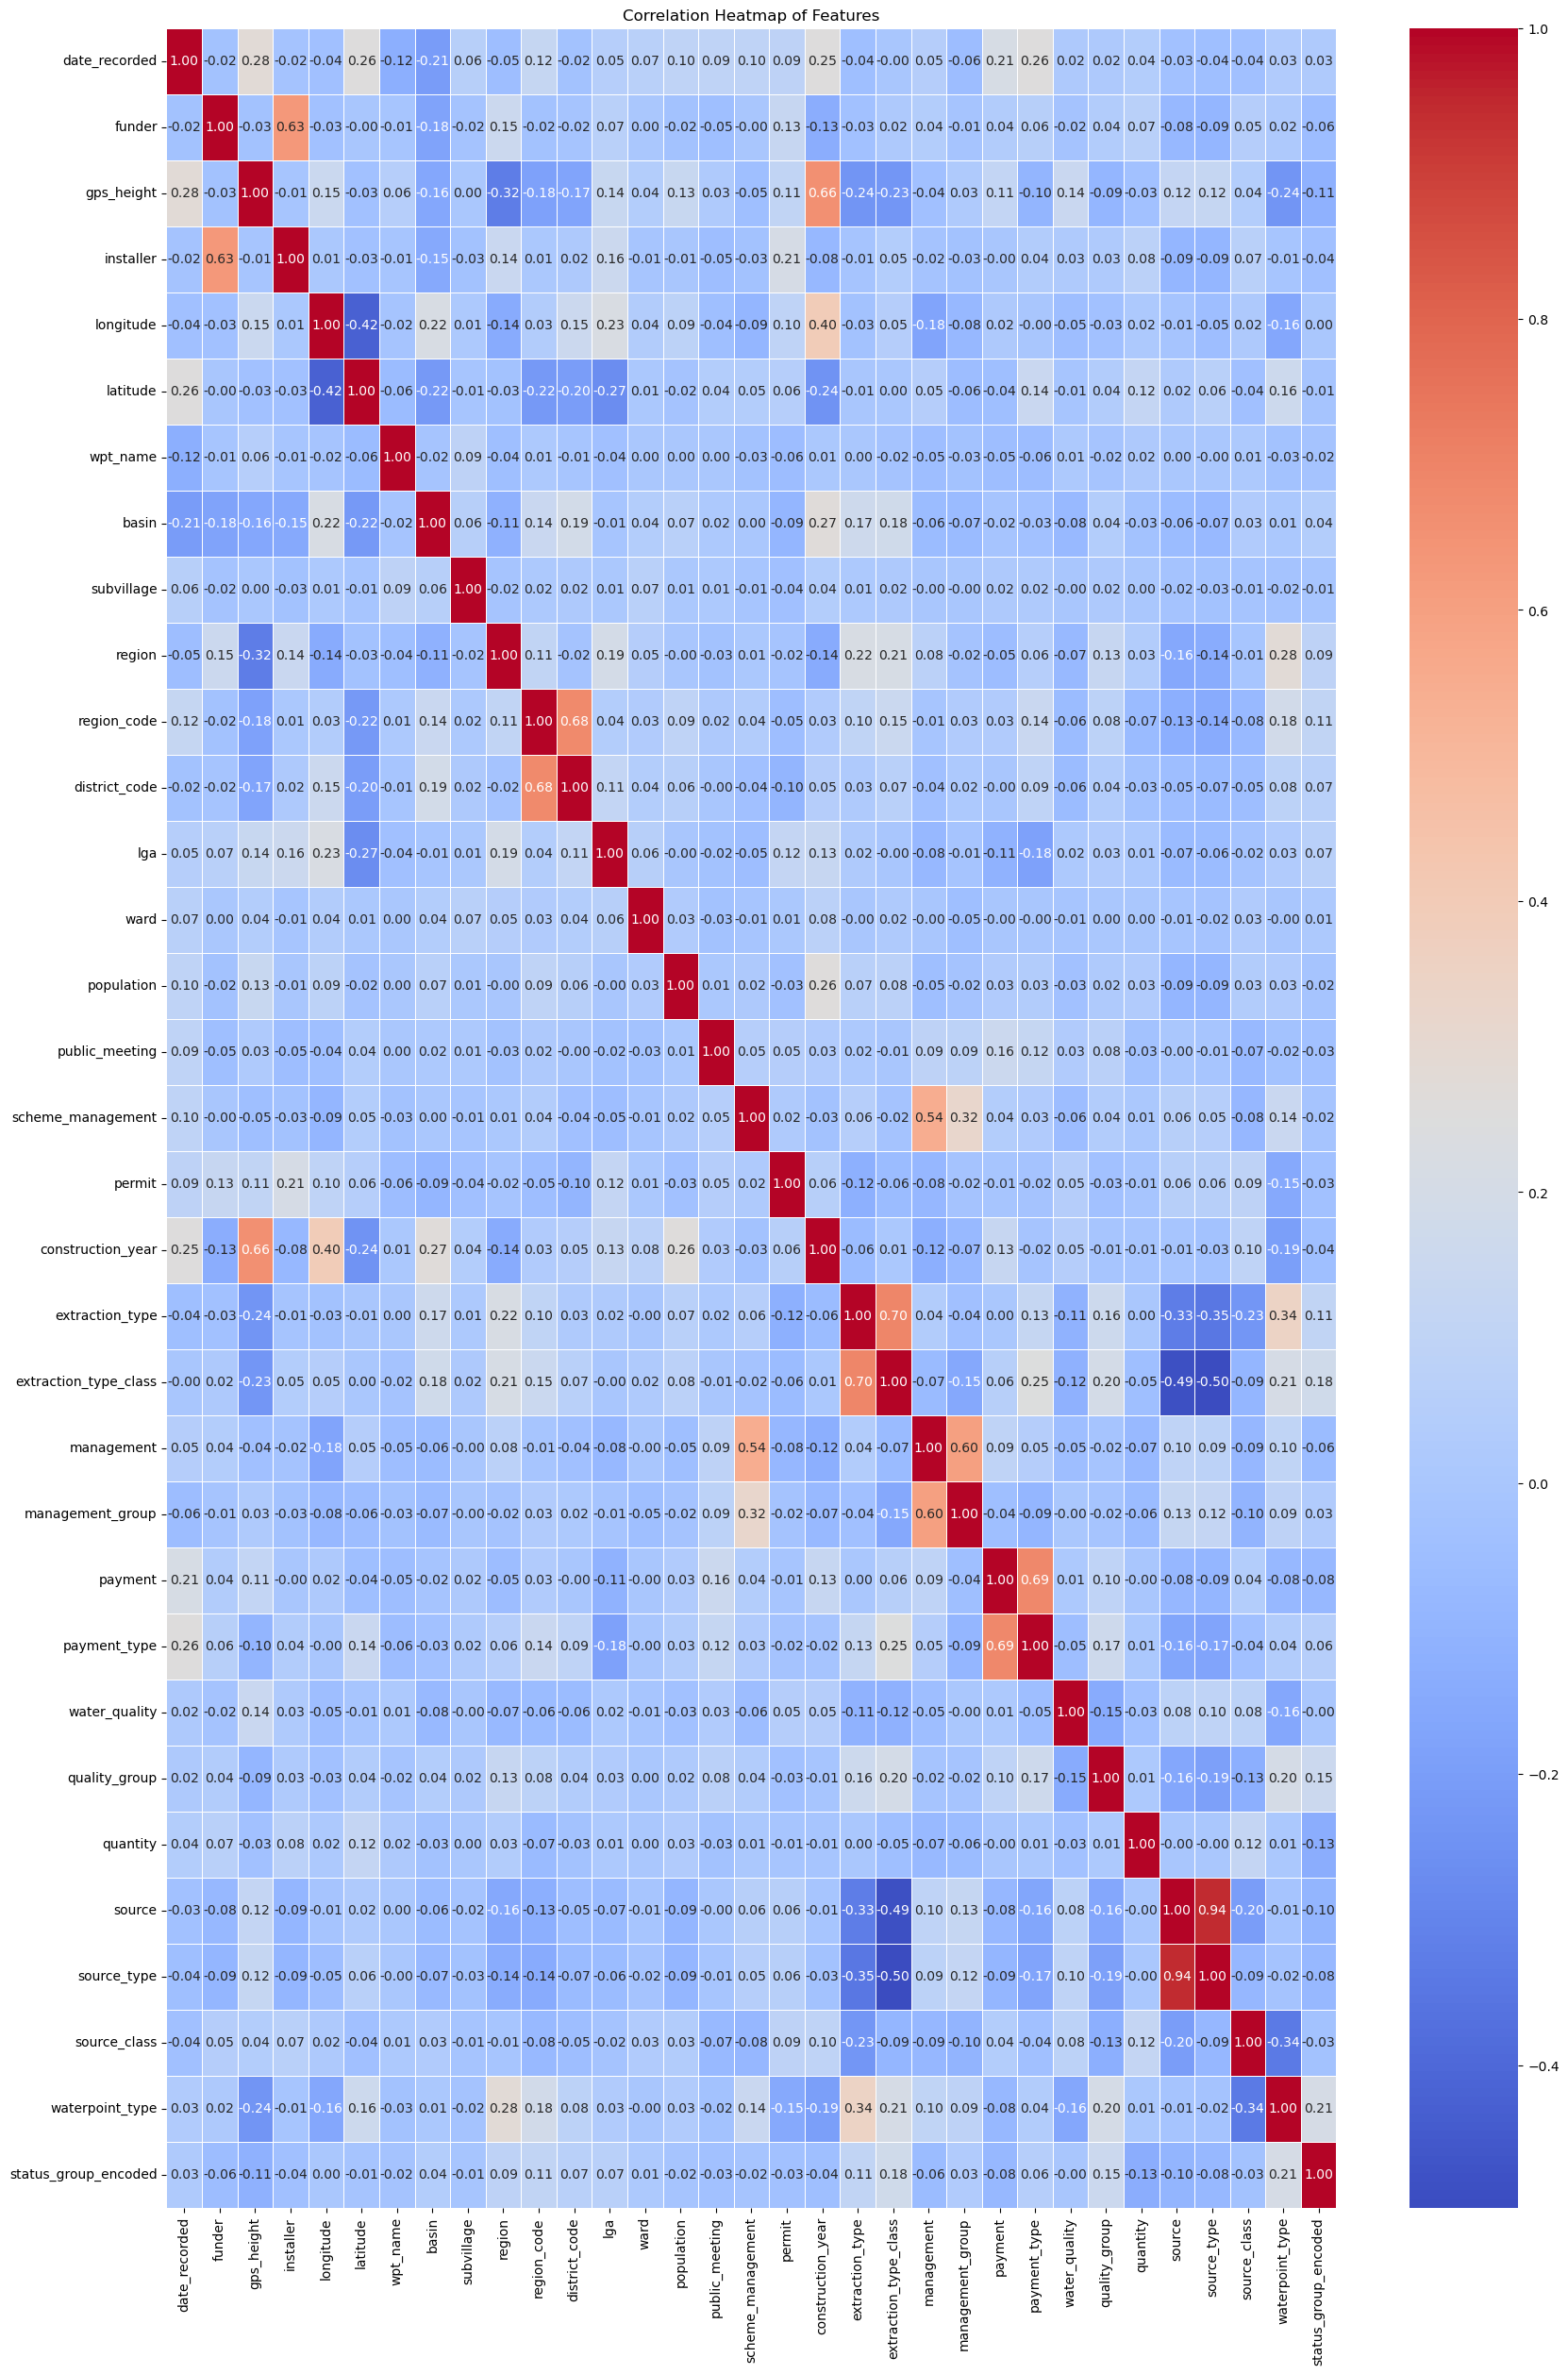

In [41]:
#plotting the correlation between features
import seaborn as sns
import matplotlib.pyplot as plt
corr = data2.corr()

plt.figure(figsize=(20, 30)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


In [42]:
#data describtion after mapping
data2.describe()

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group_encoded
count,59364.000000,59364.000000,59364.000000,59364.000000,59364.000000,5.936400e+04,59364.000000,59364.000000,59364.000000,59364.000000,...,59364.000000,59364.000000,59364.000000,59364.000000,59364.000000,59364.000000,59364.000000,59364.000000,59364.000000,59364.000000
mean,179.623038,899.588033,668.702513,828.480156,34.097560,-5.709463e+00,21102.373021,4.077219,9706.775167,9.833704,...,2.317010,2.840981,5.754093,2.263055,1.325770,6.063422,3.970639,0.233761,2.573546,0.841251
std,108.843479,611.888169,693.131013,643.832390,6.517065,2.943608e+00,12011.248714,2.473831,5526.179509,5.938029,...,2.270555,1.835552,0.901031,0.784240,0.803809,2.034158,2.191933,0.434111,1.781495,0.949812
min,0.000000,0.000000,-90.000000,0.000000,0.000000,-1.164944e+01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,446.000000,0.000000,390.000000,33.095187,-8.541904e+00,10128.750000,2.000000,5156.750000,4.000000,...,0.000000,2.000000,6.000000,2.000000,1.000000,5.000000,3.000000,0.000000,1.000000,0.000000
50%,195.000000,664.000000,370.000000,479.500000,34.910318,-5.023822e+00,22246.500000,4.000000,9659.500000,10.000000,...,2.000000,2.000000,6.000000,2.000000,1.000000,7.000000,5.000000,0.000000,2.000000,0.000000
75%,284.000000,1433.250000,1320.000000,1398.000000,37.179490,-3.326918e+00,32531.250000,6.000000,14283.000000,15.000000,...,4.000000,5.000000,6.000000,2.000000,2.000000,8.000000,6.000000,0.000000,4.000000,2.000000
max,355.000000,1896.000000,2770.000000,2144.000000,40.345193,-2.000000e-08,37399.000000,8.000000,19287.000000,20.000000,...,6.000000,6.000000,7.000000,5.000000,4.000000,9.000000,6.000000,2.000000,6.000000,2.000000


In [44]:
import pandas as pd
#split the data frame after preprocessing to data and labels dataframes
data3= data2.drop(columns=['status_group_encoded'])
labels2 = data2['status_group_encoded']
#data frame after splitting
data3

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
0,47,1368,1390,1518,34.938093,-9.856322,37398,1,11807,3,...,4,2,0,6,2,1,8,6,0,1
1,309,469,1399,545,34.698766,-2.147466,37194,4,15838,9,...,4,0,2,6,2,2,5,3,1,1
2,300,825,686,2048,37.460664,-3.821329,14572,5,9074,8,...,4,4,5,6,2,1,0,1,1,2
3,272,1740,263,1852,38.486161,-11.155298,37284,7,8982,12,...,4,0,2,6,2,0,3,0,0,2
4,104,20,0,119,31.130847,-1.825359,35528,4,7698,4,...,1,0,2,6,2,3,5,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,338,436,1210,201,37.169807,-3.253847,513,5,5681,6,...,4,4,5,6,2,1,8,6,0,1
59396,90,177,1212,265,35.249991,-9.070629,24074,6,2980,3,...,4,2,0,6,2,1,6,4,1,1
59397,75,1896,0,2131,34.017087,-8.750434,27926,6,8784,10,...,4,3,1,1,1,1,3,0,0,4
59398,41,884,0,1213,35.861315,-6.378573,29693,6,14012,2,...,4,0,2,6,2,2,7,5,0,4


In [45]:
#labels dataframe after splitting
labels2

0        0
1        0
2        0
3        2
4        0
        ..
59395    0
59396    0
59397    0
59398    0
59399    0
Name: status_group_encoded, Length: 59364, dtype: int32

In [47]:
# Split the training data and labels into training and validation sets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_validation, y_train, y_validation = train_test_split(data3, labels2, test_size=0.2, random_state=42)
print("X_train:", len(X_train))
print("y_train:", len(y_train))
print("X_validation:", len(X_validation))
print("y_validation:", len(y_validation))

X_train: 47491
y_train: 47491
X_validation: 11873
y_validation: 11873


In [48]:
X_train

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
14610,39,1531,524,1474,37.564467,-6.916935,12694,8,9047,11,...,4,3,1,6,2,2,6,4,1,1
2732,39,1639,306,390,38.558271,-5.132980,24883,5,8443,20,...,4,0,2,6,2,0,7,5,0,6
14815,121,1896,0,2131,33.655011,-9.334154,37194,1,15013,10,...,4,0,2,6,2,2,6,4,1,1
19442,108,513,0,390,31.765826,-1.001521,37398,4,11133,4,...,4,5,3,6,2,2,8,6,0,1
2624,287,456,0,571,33.519376,-3.225549,30099,4,12723,17,...,4,0,2,6,2,1,7,5,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54375,49,984,0,390,38.805012,-4.868727,27741,5,10414,20,...,4,3,1,6,2,2,8,6,0,1
38178,197,1415,0,1956,34.156994,-3.027188,1173,4,13767,17,...,4,0,2,6,2,1,7,5,0,4
860,46,1187,-13,1341,38.974416,-5.420823,21173,5,17844,20,...,0,0,2,6,2,2,7,5,0,6
15799,102,932,0,386,31.598442,-1.867235,963,4,824,4,...,4,0,2,6,2,1,8,6,0,1


# Decision Tree Model:

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_validation_dt = dt_model.predict(X_validation)
accuracy_validation_dt = accuracy_score(y_validation, y_pred_validation_dt)
print("Validation Accuracy (Decision Tree):", accuracy_validation_dt)


Validation Accuracy (Decision Tree): 0.7453886970437126


# Random Forest Model:

In [72]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=900, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_validation_rf = rf_model.predict(X_validation)
accuracy_validation_rf = accuracy_score(y_validation, y_pred_validation_rf)
print("Validation Accuracy (Random Forest):", accuracy_validation_rf)


Validation Accuracy (Random Forest): 0.809989050787501


In [79]:
#random forest 2
# change the n_estimator parameter(2000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model2 = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_model2.fit(X_train, y_train)
y_pred_validation_rf2 = rf_model2.predict(X_validation)
accuracy_validation_rf2 = accuracy_score(y_validation, y_pred_validation_rf2)
print("Validation Accuracy (Random Forest2):", accuracy_validation_rf2)

Validation Accuracy (Random Forest2): 0.8108312979028047


In [78]:
#random forest 3
# change the n_estimator parameter(3000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model3 = RandomForestClassifier(n_estimators=3000, random_state=42)
rf_model3.fit(X_train, y_train)
y_pred_validation_rf3 = rf_model3.predict(X_validation)
accuracy_validation_rf3 = accuracy_score(y_validation, y_pred_validation_rf3)
print("Validation Accuracy (Random Forest):", accuracy_validation_rf3)

Validation Accuracy (Random Forest): 0.8103259496336225


In [57]:
# re-preprocessing the data
data3

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
0,47,1368,1390,1518,34.938093,-9.856322,37398,1,11807,3,...,4,2,0,6,2,1,8,6,0,1
1,309,469,1399,545,34.698766,-2.147466,37194,4,15838,9,...,4,0,2,6,2,2,5,3,1,1
2,300,825,686,2048,37.460664,-3.821329,14572,5,9074,8,...,4,4,5,6,2,1,0,1,1,2
3,272,1740,263,1852,38.486161,-11.155298,37284,7,8982,12,...,4,0,2,6,2,0,3,0,0,2
4,104,20,0,119,31.130847,-1.825359,35528,4,7698,4,...,1,0,2,6,2,3,5,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,338,436,1210,201,37.169807,-3.253847,513,5,5681,6,...,4,4,5,6,2,1,8,6,0,1
59396,90,177,1212,265,35.249991,-9.070629,24074,6,2980,3,...,4,2,0,6,2,1,6,4,1,1
59397,75,1896,0,2131,34.017087,-8.750434,27926,6,8784,10,...,4,3,1,1,1,1,3,0,0,4
59398,41,884,0,1213,35.861315,-6.378573,29693,6,14012,2,...,4,0,2,6,2,2,7,5,0,4


In [58]:
#capy from the data and drop some suggested features
data4 = data3
data4 =data4.drop(columns=['funder', 'installer' , 'subvillage' , 'wpt_name'])
data4

,date_recorded,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,ward,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
0,47,1390,34.938093,-9.856322,1,3,11,5,51,1426,...,4,2,0,6,2,1,8,6,0,1
1,309,1399,34.698766,-2.147466,4,9,20,2,103,1576,...,4,0,2,6,2,2,5,3,1,1
2,300,686,37.460664,-3.821329,5,8,21,4,108,1624,...,4,4,5,6,2,1,0,1,1,2
3,272,263,38.486161,-11.155298,7,12,90,63,87,1571,...,4,0,2,6,2,0,3,0,0,2
4,104,0,31.130847,-1.825359,4,4,18,1,26,1687,...,1,0,2,6,2,3,5,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,338,1210,37.169807,-3.253847,5,6,3,5,16,1090,...,4,4,5,6,2,1,8,6,0,1
59396,90,1212,35.249991,-9.070629,6,3,11,4,91,353,...,4,2,0,6,2,1,6,4,1,1
59397,75,0,34.017087,-8.750434,6,10,12,7,59,177,...,4,3,1,1,1,1,3,0,0,4
59398,41,0,35.861315,-6.378573,6,2,1,4,11,1449,...,4,0,2,6,2,2,7,5,0,4


In [59]:
#splitting the data frame after re-preprocessing it
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train2, X_validation2, y_train2, y_validation2 = train_test_split(data4, labels2, test_size=0.2, random_state=42)
print("X_train:", len(X_train2))
print("y_train:", len(y_train2))
print("X_validation:", len(X_validation2))
print("y_validation:", len(y_validation2))


X_train: 47491
y_train: 47491
X_validation: 11873
y_validation: 11873


In [64]:
#reapply random forest model to test the validation accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train2, y_train2)
y_pred_validation_rf = rf_model.predict(X_validation2)
accuracy_validation_rf = accuracy_score(y_validation2, y_pred_validation_rf)
print("Validation Accuracy (Random Forest):", accuracy_validation_rf)

Validation Accuracy (Random Forest): 0.8019034784805862


# XG Boost:

In [73]:
#XGBoost model after re-preprocessing tha data
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=700, random_state=42)
xgb_model.fit(X_train2, y_train2)
y_pred_validation_xgb = xgb_model.predict(X_validation2)
accuracy_validation_xgb = accuracy_score(y_validation2, y_pred_validation_xgb)
print("Validation Accuracy (XGBoost):", accuracy_validation_xgb)


Validation Accuracy (XGBoost): 0.7994609618462056


# CatBoost:

In [75]:
#CatBoost model after re-preprocessing tha data
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(n_estimators=1500, random_state=42, verbose=False)
catboost_model.fit(X_train2, y_train2)
y_pred_validation_catboost = catboost_model.predict(X_validation2)
accuracy_validation_catboost = accuracy_score(y_validation2, y_pred_validation_catboost)
print("Validation Accuracy (CatBoost):", accuracy_validation_catboost)


Validation Accuracy (CatBoost): 0.8013139054998737


#  Testing the Model

In [82]:
#replace the id to test dataset to being able to testing
import pandas as pd
test3 = pd.merge(test2, test[['id']], left_index=True, right_index=True)
test3

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,id
0,279,307,1996,375,35.290799,-4.059696,-1,0,8922,8,...,0,2,6,2,3,5,3,1,6,50785
1,279,456,1569,390,36.656709,-3.309214,-1,5,-1,0,...,0,2,6,2,2,8,6,0,1,51630
2,276,-1,1567,-1,34.767863,-5.004344,33644,0,12198,18,...,0,2,6,2,2,5,3,1,6,17168
3,266,395,267,487,38.058046,-9.418672,-1,7,6420,7,...,6,6,6,2,0,7,5,0,6,45559
4,330,134,1260,145,35.006123,-10.950412,20106,7,8110,16,...,3,1,6,2,1,8,6,0,1,49871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,29,261,34,404,38.852669,-6.582841,-1,8,19197,14,...,0,2,6,2,1,6,4,1,1,39307
14846,54,523,0,607,37.451633,-5.350428,-1,5,11424,20,...,2,0,4,4,2,7,5,0,4,18990
14847,307,-1,1476,-1,34.739804,-4.585587,1465,0,4277,18,...,0,2,6,2,2,0,1,1,1,28749
14848,293,432,998,390,35.432732,-10.584159,11849,1,14232,16,...,0,2,6,2,2,6,4,1,1,33492


# Submission File

In [86]:
#saving predictions in csv file
import pandas as pd
ids=test['id']
test_predictions = rf_model2.predict(test2)
submission_df = pd.DataFrame({'id': ids, 'predicted_label': test_predictions})
submission_df.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")


Predictions saved to submission.csv


In [87]:
#load the csv file
sub = pd.read_csv("submission.csv") 
sub

,id,predicted_label
0,50785,2
1,51630,0
2,17168,2
3,45559,2
4,49871,0
...,...,...
14845,39307,2
14846,18990,0
14847,28749,0
14848,33492,0


In [89]:
#decoding the integer(categorica values of classifier to the orirginal class names)
import pandas as pd
class_names = ['functional', 'functional needs repair', 'non functional']
#mapping
sub['status_group'] = sub['predicted_label'].map({0: 'functional', 1: 'functional needs repair', 2: 'non functional'})
submission_final = sub.drop(columns=['predicted_label'])
submission_final.to_csv('submission_final.csv', index=False)
print("Final submission saved to submission_final.csv")

Final submission saved to submission_final.csv


In [90]:
#display the submission file (predicted values)
s= pd.read_csv("submission_final.csv")
s

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional
